In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [28]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [29]:
data.shape

(7920, 3)

In [30]:
data.duplicated().sum()

0

In [31]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [32]:
import re
import string

In [33]:
data['tweet'].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [34]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [35]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [36]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [37]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [38]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
    
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [39]:
data['tweet'].head(4)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
Name: tweet, dtype: object

In [40]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [41]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [42]:
pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 162.5 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 186.2 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 186.2 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 178.6 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 135.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - ---------------------------------

In [43]:
import nltk

In [44]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [45]:
 with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [46]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [48]:
data['tweet'].head(4)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
Name: tweet, dtype: object

In [50]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [51]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [52]:
data['tweet'].head(4)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
Name: tweet, dtype: object

##Make Vocabulary

In [53]:
from collections import Counter
vocab = Counter()

In [54]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [55]:
len(vocab)

15949

In [56]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [57]:
tokens = [key for key in vocab if vocab[key] > 10]

In [58]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [59]:
len(tokens)

1145

In [60]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [61]:
X = data['tweet']
y = data['label']

In [62]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [63]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [ ]:
pip install scikit-learn

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
X_train.shape

(6336,)

In [69]:
y_train.shape

(6336,)

In [70]:
X_test.shape

(1584,)

In [72]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
   
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
          
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
               sentence_lst[i] = 1
  
        vectorized_lst.append(sentence_lst)
    
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [73]:
vectorized_x_train = vectorizer(X_train, tokens)

In [74]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
vectorized_x_test = vectorizer(X_test, tokens)

In [76]:
y_train.value_counts()

label
0    4744
1    1592
Name: count, dtype: int64

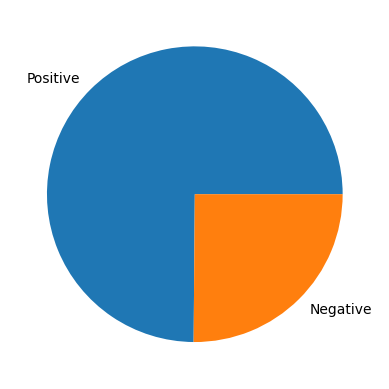

In [77]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [78]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.0 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.0 kB 164.3 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.0 kB 164.3 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.0 kB 193.2 kB/s eta 0:00:02
   ------------ -------------------------- 81.9/258.0 kB 218.5 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.0 kB 218.5 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.0 kB 194.1 kB/s eta 0:00:01
   

In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9488, 1145) (9488,)


In [80]:
y_train_smote.value_counts()

label
0    4744
1    4744
Name: count, dtype: int64

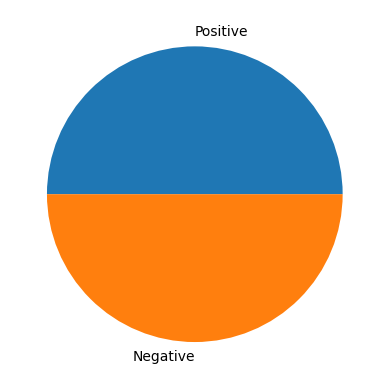

In [82]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [83]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [84]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9483    1
9484    1
9485    1
9486    1
9487    1
Name: label, Length: 9488, dtype: int64

In [85]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [86]:
y_test

5902    0
5511    1
7867    1
7703    0
1407    0
       ..
4652    0
2559    0
5921    0
5079    0
7660    1
Name: label, Length: 1584, dtype: int64

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [89]:
 from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\\n\\tAccuracy = {acc}\\n\\tPrecision = {pr}\\n\\tRecall = {rec}\\n\\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\\n\\tAccuracy = {acc}\\n\\tPrecision = {pr}\\n\\tRecall = {rec}\\n\\tF1-Score = {f1}')

In [90]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [91]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [92]:
y_test_pred = lr.predict(vectorized_x_test)

In [93]:
training_scores(y_train_smote, y_train_pred)

Training Scores:\n\tAccuracy = 0.939\n\tPrecision = 0.913\n\tRecall = 0.971\n\tF1-Score = 0.941


In [94]:
validation_scores(y_test, y_test_pred)

Testing Scores:\n\tAccuracy = 0.872\n\tPrecision = 0.723\n\tRecall = 0.862\n\tF1-Score = 0.787


In [95]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)
 
y_train_pred = mnb.predict(vectorized_x_train_smote)
    
y_test_pred = mnb.predict(vectorized_x_test)
  
training_scores(y_train_smote, y_train_pred)
   
validation_scores(y_test, y_test_pred)

Training Scores:\n\tAccuracy = 0.906\n\tPrecision = 0.868\n\tRecall = 0.956\n\tF1-Score = 0.91
Testing Scores:\n\tAccuracy = 0.869\n\tPrecision = 0.696\n\tRecall = 0.924\n\tF1-Score = 0.794


In [96]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)
 
y_train_pred = dt.predict(vectorized_x_train_smote)
    
y_test_pred = dt.predict(vectorized_x_test)
  
training_scores(y_train_smote, y_train_pred)
   
validation_scores(y_test, y_test_pred)

Training Scores:\n\tAccuracy = 1.0\n\tPrecision = 1.0\n\tRecall = 0.999\n\tF1-Score = 1.0
Testing Scores:\n\tAccuracy = 0.825\n\tPrecision = 0.683\n\tRecall = 0.675\n\tF1-Score = 0.679


In [97]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)
 
y_train_pred = rf.predict(vectorized_x_train_smote)
    
y_test_pred = rf.predict(vectorized_x_test)
  
training_scores(y_train_smote, y_train_pred)
   
validation_scores(y_test, y_test_pred)

Training Scores:\n\tAccuracy = 1.0\n\tPrecision = 0.999\n\tRecall = 1.0\n\tF1-Score = 1.0
Testing Scores:\n\tAccuracy = 0.873\n\tPrecision = 0.782\n\tRecall = 0.744\n\tF1-Score = 0.763


In [98]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)
 
y_train_pred = svm.predict(vectorized_x_train_smote)
    
y_test_pred = svm.predict(vectorized_x_test)
  
training_scores(y_train_smote, y_train_pred)
   
validation_scores(y_test, y_test_pred)

Training Scores:\n\tAccuracy = 0.978\n\tPrecision = 0.96\n\tRecall = 0.997\n\tF1-Score = 0.978
Testing Scores:\n\tAccuracy = 0.883\n\tPrecision = 0.761\n\tRecall = 0.836\n\tF1-Score = 0.797


In [100]:
import pickle
with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)